In [1]:
import os
os.listdir()


['.config', 'store-sales-time-series-forecasting.zip', 'sample_data']

In [2]:
!unzip store-sales-time-series-forecasting.zip


Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [3]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.shape


(3000888, 6)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
df.isnull().sum()


,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


In [7]:
df.describe()


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


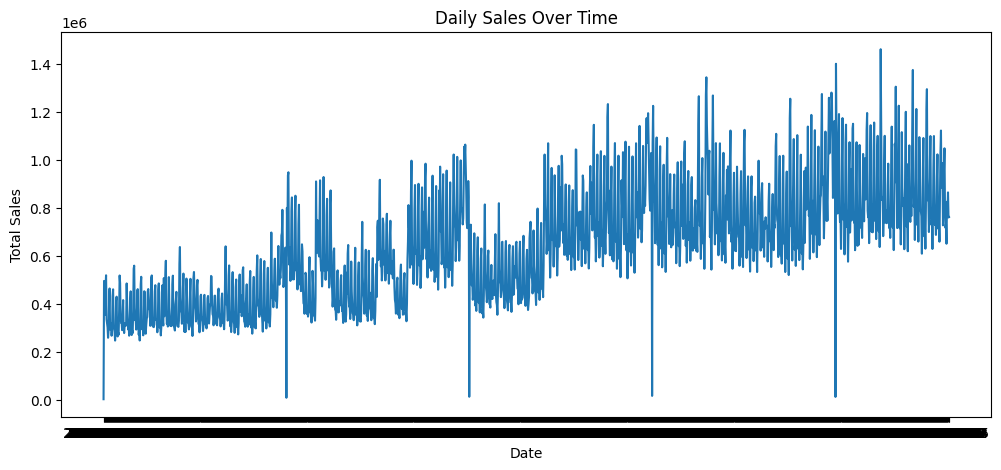

In [8]:
daily_sales = df.groupby('date')['sales'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [10]:
monthly_sales = df.groupby(df['date'].dt.month)['sales'].sum()

plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [12]:
df['date'] = pd.to_datetime(df['date'])


In [13]:
df['date'].dtype




dtype('<M8[ns]')

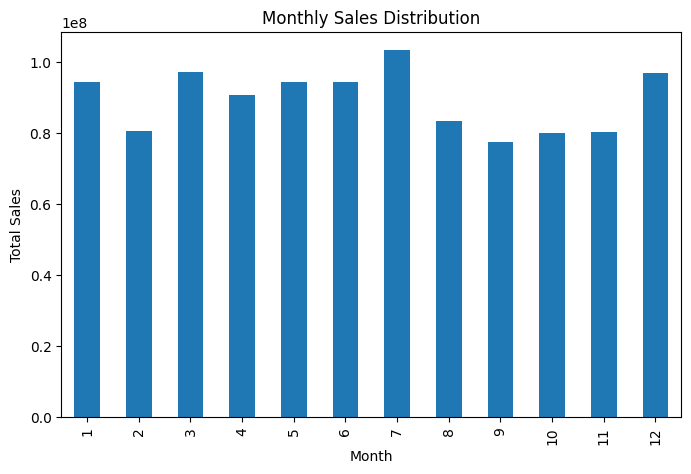

In [14]:
monthly_sales = df.groupby(df['date'].dt.month)['sales'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()
